In [1]:
from data_loading import load_testing_data, get_key, segmentation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


%load_ext autoreload
%autoreload 2

In [2]:
labels, images, images_seg, labels_dict = load_testing_data()



# train_labels, test_labels = tf.keras.utils.split_dataset(labels, left_size=0.75, shuffle=False, seed=None)
# train_images, test_images = tf.keras.utils.split_dataset(images, left_size=0.75, shuffle=False, seed=None)

In [3]:
scaled_images_seg = []
scaled_images = []
for img in images_seg:
    scaled_img_seg = cv.resize(img, None, fx= 0.3, fy= 0.3, interpolation= cv.INTER_LINEAR)
    scaled_images_seg.append(scaled_img_seg)

for img in images:
    scaled_img = cv.resize(img, None, fx= 0.3, fy= 0.3, interpolation= cv.INTER_LINEAR)
    scaled_images.append(scaled_img)



In [4]:
print(str(scaled_img.shape))

(67, 67, 3)


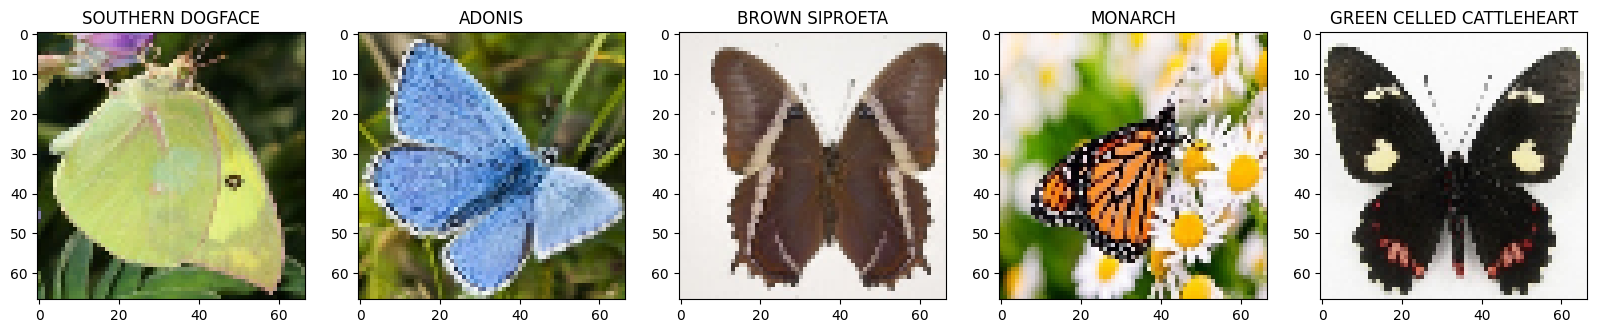

In [5]:
plt.figure(figsize=(20,5))                # Create a figure of size 20x5

# Create subplots of one row and three columns: subplot(nrows, ncols, index, **kwargs)
# For documentation, see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
plt.subplot(1, 5, 1),plt.imshow(cv.cvtColor(scaled_images[0], cv.COLOR_BGR2RGB)),plt.title(get_key(0, labels_dict))
plt.subplot(1, 5, 2),plt.imshow(cv.cvtColor(scaled_images[1], cv.COLOR_BGR2RGB)),plt.title(get_key(1, labels_dict))
plt.subplot(1, 5, 3),plt.imshow(cv.cvtColor(scaled_images[2], cv.COLOR_BGR2RGB)),plt.title(get_key(2, labels_dict))
plt.subplot(1, 5, 4),plt.imshow(cv.cvtColor(scaled_images[3], cv.COLOR_BGR2RGB)),plt.title(get_key(3, labels_dict))
plt.subplot(1, 5, 5),plt.imshow(cv.cvtColor(scaled_images[4], cv.COLOR_BGR2RGB)),plt.title(get_key(4, labels_dict))
plt.show()

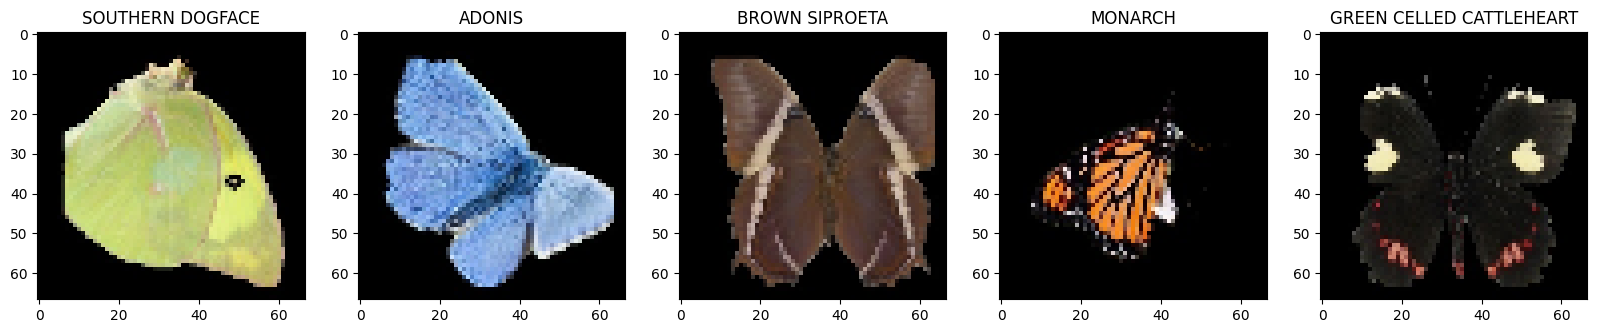

In [6]:
plt.figure(figsize=(20,5))                # Create a figure of size 20x5

# Create subplots of one row and three columns: subplot(nrows, ncols, index, **kwargs)
# For documentation, see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
plt.subplot(1, 5, 1),plt.imshow(cv.cvtColor(scaled_images_seg[0], cv.COLOR_BGR2RGB)),plt.title(get_key(0, labels_dict))
plt.subplot(1, 5, 2),plt.imshow(cv.cvtColor(scaled_images_seg[1], cv.COLOR_BGR2RGB)),plt.title(get_key(1, labels_dict))
plt.subplot(1, 5, 3),plt.imshow(cv.cvtColor(scaled_images_seg[2], cv.COLOR_BGR2RGB)),plt.title(get_key(2, labels_dict))
plt.subplot(1, 5, 4),plt.imshow(cv.cvtColor(scaled_images_seg[3], cv.COLOR_BGR2RGB)),plt.title(get_key(3, labels_dict))
plt.subplot(1, 5, 5),plt.imshow(cv.cvtColor(scaled_images_seg[4], cv.COLOR_BGR2RGB)),plt.title(get_key(4, labels_dict))
plt.show()

In [7]:

# index = 0
# labels_seg = labels
# while index < 6499:
#     rotated_img = cv.rotate(scaled_images_seg[index], cv.ROTATE_90_CLOCKWISE)
#     scaled_images_seg.append(rotated_img)
#     label = labels[index]
#     labels_seg.append(label)
#     index += 100


In [8]:
# for key, value in labels_dict.items():
#         print(key, value)
label = labels[-5]
print(label, get_key(label[0], labels_dict))

[8] MANGROVE SKIPPER


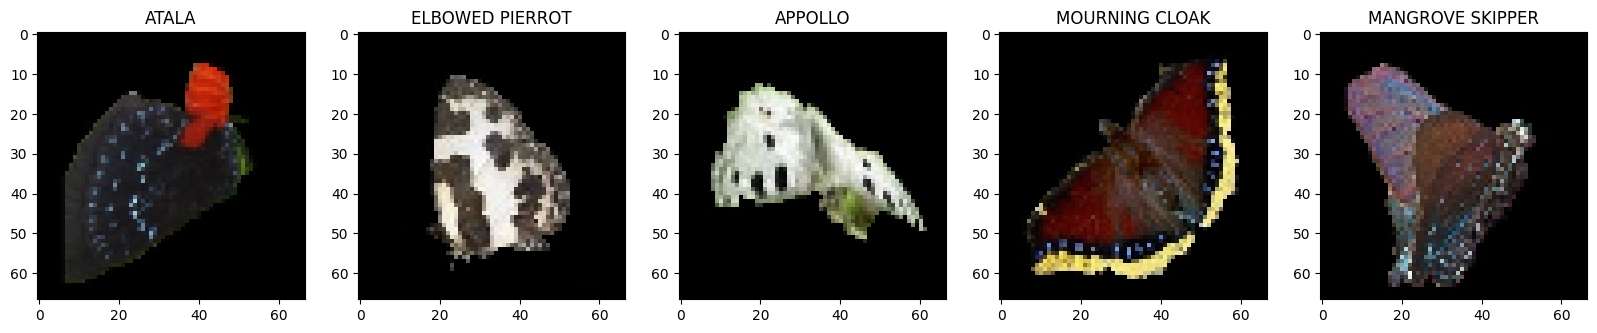

In [9]:
plt.figure(figsize=(20,5))                # Create a figure of size 20x5

# Create subplots of one row and three columns: subplot(nrows, ncols, index, **kwargs)
# For documentation, see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
plt.subplot(1, 5, 1),plt.imshow(cv.cvtColor(scaled_images_seg[-1], cv.COLOR_BGR2RGB)),plt.title(get_key(labels[-1][0], labels_dict))
plt.subplot(1, 5, 2),plt.imshow(cv.cvtColor(scaled_images_seg[-2], cv.COLOR_BGR2RGB)),plt.title(get_key(labels[-2][0], labels_dict))
plt.subplot(1, 5, 3),plt.imshow(cv.cvtColor(scaled_images_seg[-3], cv.COLOR_BGR2RGB)),plt.title(get_key(labels[-3][0], labels_dict))
plt.subplot(1, 5, 4),plt.imshow(cv.cvtColor(scaled_images_seg[-4], cv.COLOR_BGR2RGB)),plt.title(get_key(labels[-4][0], labels_dict))
plt.subplot(1, 5, 5),plt.imshow(cv.cvtColor(scaled_images_seg[-5], cv.COLOR_BGR2RGB)),plt.title(get_key(labels[-5][0], labels_dict))
plt.show()

In [10]:
images_train, images_test, labels_train, labels_test = train_test_split(scaled_images_seg, labels, test_size=0.3, random_state=35)
images_train = (np.expand_dims(images_train, axis=-1)/255.).astype(np.float32)
labels_train = np.array((labels_train)).astype(np.int64)
images_test = (np.expand_dims(images_test, axis=-1)/255.).astype(np.float32)
labels_test = np.array((labels_test)).astype(np.int64)

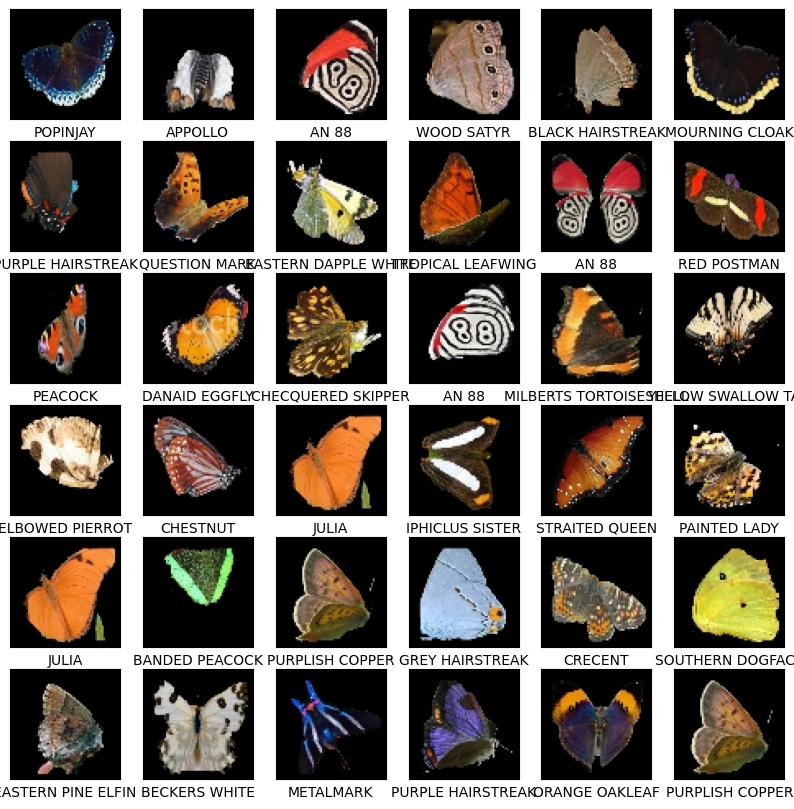

In [11]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(1000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(cv.cvtColor(np.squeeze(images_train[image_ind]),cv.COLOR_BGR2RGB), cmap=plt.cm.binary)
    plt.xlabel(get_key(labels_train[image_ind], labels_dict))

In [12]:
def build_cnn_model():
    cnn_model = tf.keras.models.Sequential()

    # Define the first convolutional layer
    cnn_model.add(layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu', input_shape=(images_train[0].shape[0:3])))


    # Define the first max pooling layer
    cnn_model.add(layers.MaxPool2D(pool_size=(2,2)))

    # Define the second convolutional layer
    cnn_model.add(layers.Conv2D(filters=24, kernel_size=(5,5), activation='relu'))

    # Define the second max pooling layer
    cnn_model.add(layers.MaxPool2D(pool_size=(3,3)))

    # Flatten the volume into a vector
    cnn_model.add(layers.Flatten())
    
    # A hidden fully connected layer
    cnn_model.add(layers.Dense(90, activation='relu'))

    # Add dropout layer
    cnn_model.add(layers.Dropout(0.3))

    # Define the last Dense layer to output the classification probabilities. 
    # Pay attention to the activation needed a probability output
    cnn_model.add(layers.Dense(75, activation='softmax'))
    
    return cnn_model
  
cnn_model = build_cnn_model()

# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 65, 65, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 24)        30024     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 24)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1944)              0         
                                                                 
 dense (Dense)               (None, 90)                1

In [13]:
#Define the compile operation with your optimizer and learning rate of choice
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 65
EPOCHS = 10

# Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.
history = cnn_model.fit(images_train, labels_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                        validation_data=(images_test, labels_test))

Epoch 1/10
70/70 [==============================] - 15s 202ms/step - loss: 4.1569 - accuracy: 0.0413 - val_loss: 3.7154 - val_accuracy: 0.0928
Epoch 2/10
70/70 [==============================] - 14s 199ms/step - loss: 3.4692 - accuracy: 0.1473 - val_loss: 3.0226 - val_accuracy: 0.2410
Epoch 3/10
70/70 [==============================] - 14s 196ms/step - loss: 2.8871 - accuracy: 0.2499 - val_loss: 2.5629 - val_accuracy: 0.3482
Epoch 4/10
70/70 [==============================] - 14s 207ms/step - loss: 2.5003 - accuracy: 0.3379 - val_loss: 2.2549 - val_accuracy: 0.4256
Epoch 5/10
70/70 [==============================] - 15s 215ms/step - loss: 2.2264 - accuracy: 0.3931 - val_loss: 2.0517 - val_accuracy: 0.4728
Epoch 6/10
70/70 [==============================] - 14s 193ms/step - loss: 1.9447 - accuracy: 0.4638 - val_loss: 1.8817 - val_accuracy: 0.5062
Epoch 7/10
70/70 [==============================] - 13s 188ms/step - loss: 1.7563 - accuracy: 0.5019 - val_loss: 1.8237 - val_accuracy: 0.5297

In [15]:
cnn_model.save("./cnn/models")

INFO:tensorflow:Assets written to: ./cnn/models\assets


INFO:tensorflow:Assets written to: ./cnn/models\assets


In [16]:
model = keras.models.load_model("./cnn/models/")

In [40]:
predictions = model.predict(images_test)
predicted_labels = []

for prediction in predictions:
    index = np.argmax(prediction)
    label = get_key(index, labels_dict)
    predicted_labels.append(label)

61/61 [==============================] - 1s 23ms/step


In [47]:
print(images_test[0].shape)
img = images_test[0, :, :, :, 0]
print(img.shape)

(67, 67, 3, 1)
(67, 67, 3)


CLOUDED SULPHUR
CRIMSON PATCH
PEACOCK
MALACHITE
EASTERN COMA


(<Axes: title={'center': 'CRECENT'}>,
 Text(0.5, 1.0, 'CRECENT'))

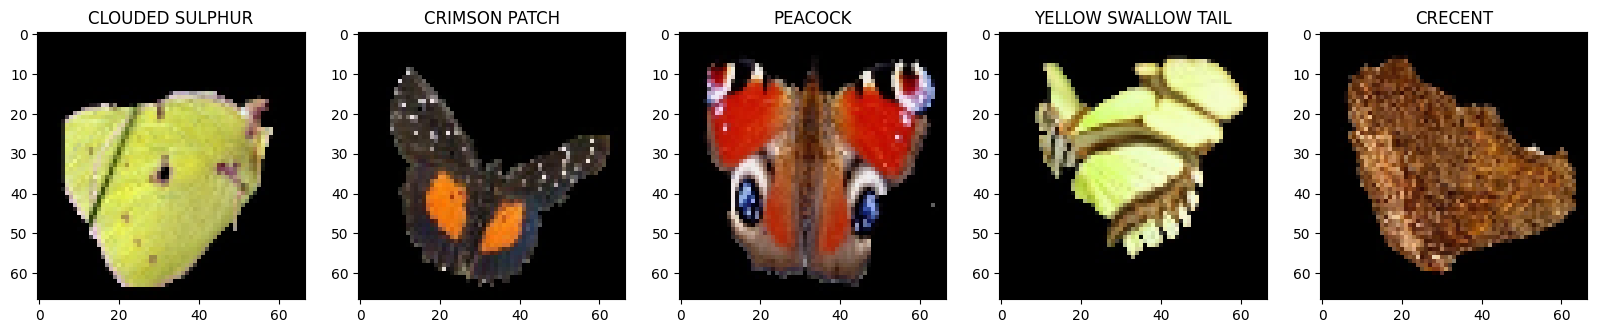

In [51]:

plt.figure(figsize=(20,5))

for i in range(5):
    print(get_key(labels_test[i], labels_dict))



plt.subplot(1, 5, 1), plt.imshow(cv.cvtColor(images_test[0,:,:,:,0], cv.COLOR_BGR2RGB)), plt.title(predicted_labels[0])
plt.subplot(1, 5, 2), plt.imshow(cv.cvtColor(images_test[1,:,:,:,0], cv.COLOR_BGR2RGB)), plt.title(predicted_labels[1])
plt.subplot(1, 5, 3), plt.imshow(cv.cvtColor(images_test[2,:,:,:,0], cv.COLOR_BGR2RGB)), plt.title(predicted_labels[2])
plt.subplot(1, 5, 4), plt.imshow(cv.cvtColor(images_test[3,:,:,:,0], cv.COLOR_BGR2RGB)), plt.title(predicted_labels[3])
plt.subplot(1, 5, 5), plt.imshow(cv.cvtColor(images_test[4,:,:,:,0], cv.COLOR_BGR2RGB)), plt.title(predicted_labels[4])
    